In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


main_df = pd.read_csv("raw\\application_data_cleaned_v1.csv")
main_df.isnull().sum()
main_df.dropna(axis=0,inplace=True)


In [3]:
main_df['AMT_INCOME_TOTAL'].min()
main_df_NO_outlier = main_df[(np.abs(stats.zscore(main_df["AMT_INCOME_TOTAL"])) < 3)]
print(main_df_NO_outlier["AMT_INCOME_TOTAL"].max())
print(main_df_NO_outlier["AMT_INCOME_TOTAL"].min())
# max income is 117000000.0, min 25650.0
bins_income = [0,50000,100000,150000,200000,400000,800000,1600000,3200000]
main_df_NO_outlier['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df_NO_outlier['AMT_INCOME_TOTAL'], bins_income)
df_dfaulters = main_df_NO_outlier[main_df_NO_outlier['TARGET']==1]
df_normal = main_df_NO_outlier[main_df_NO_outlier['TARGET']==0]

1170000.0
25650.0


C:\Users\zw\AppData\Local\Temp\ipykernel_15824\4062789617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_NO_outlier['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df_NO_outlier['AMT_INCOME_TOTAL'], bins_income)


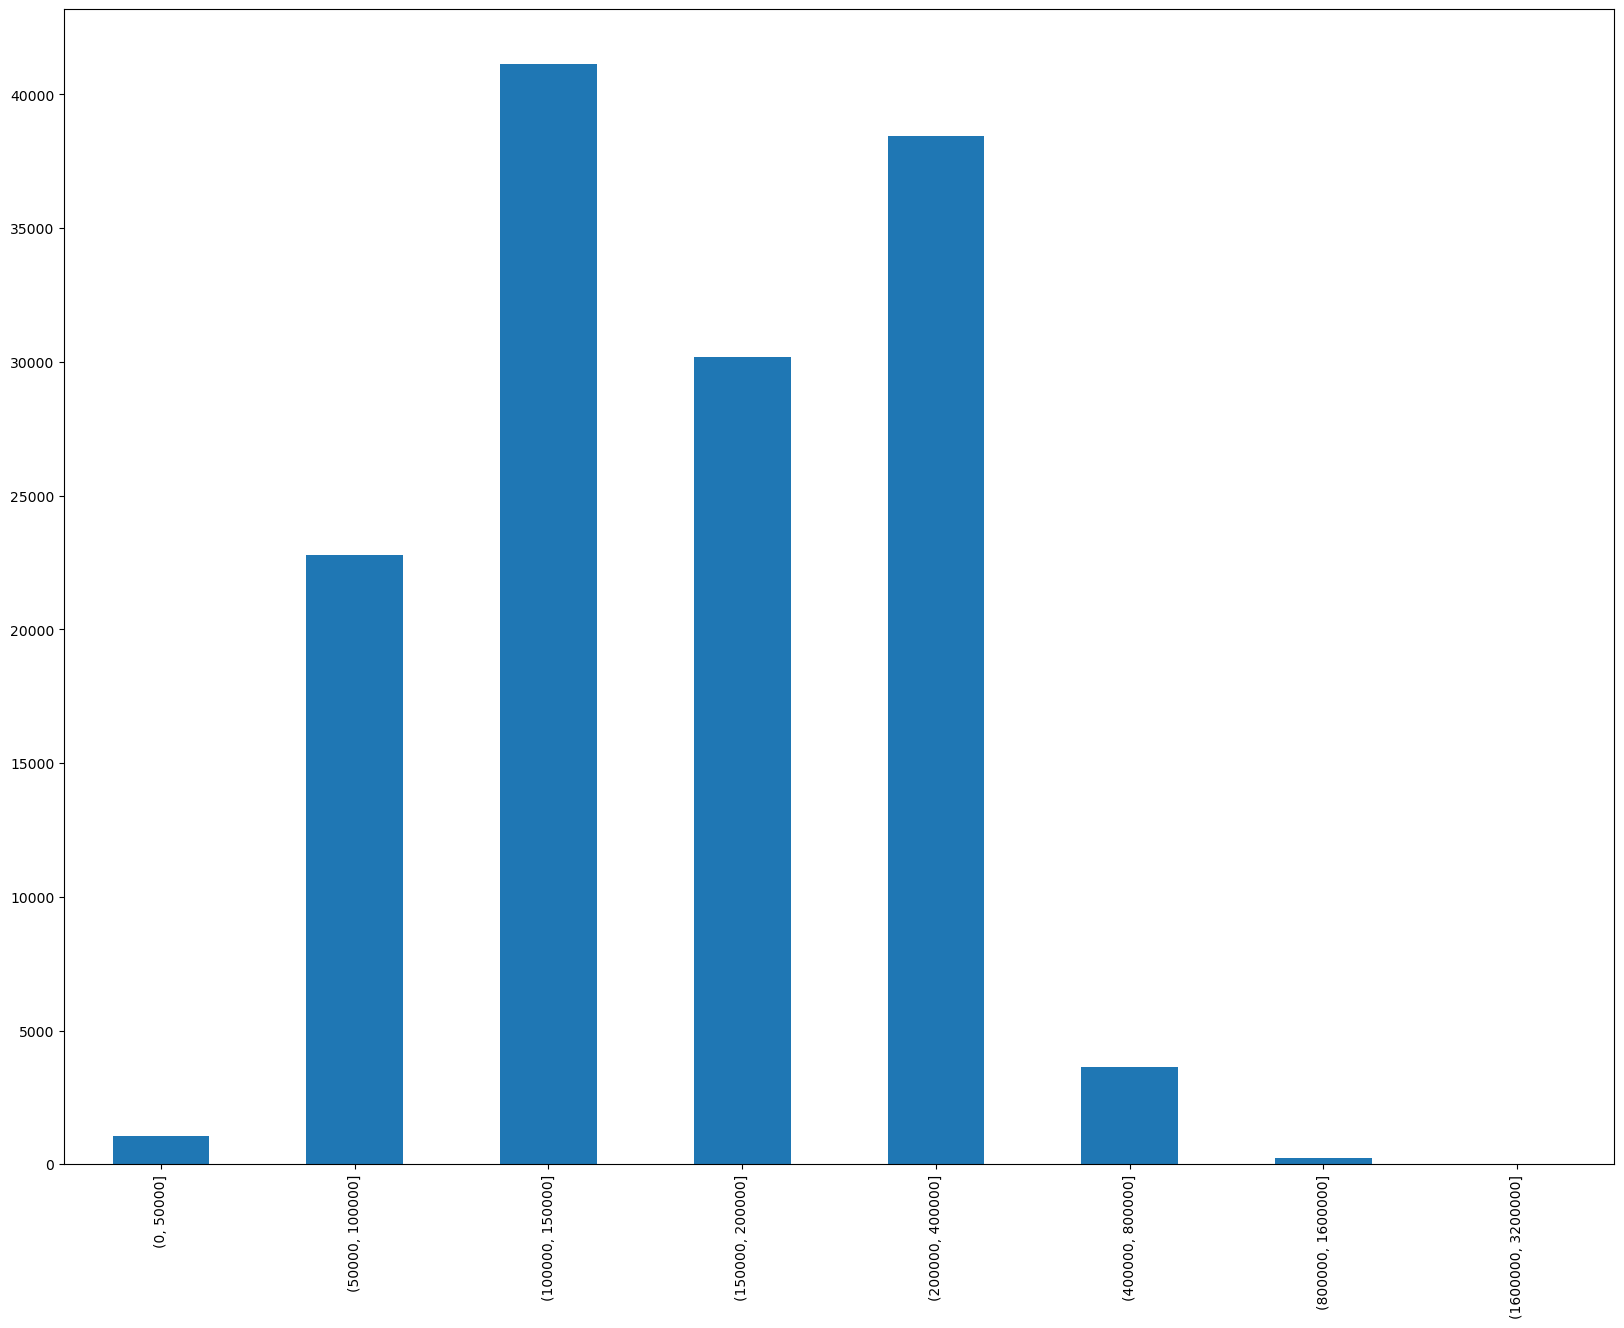

In [4]:
fig_income_all = main_df_NO_outlier['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,15))
plt.savefig('figures\\fig_income_all.png')


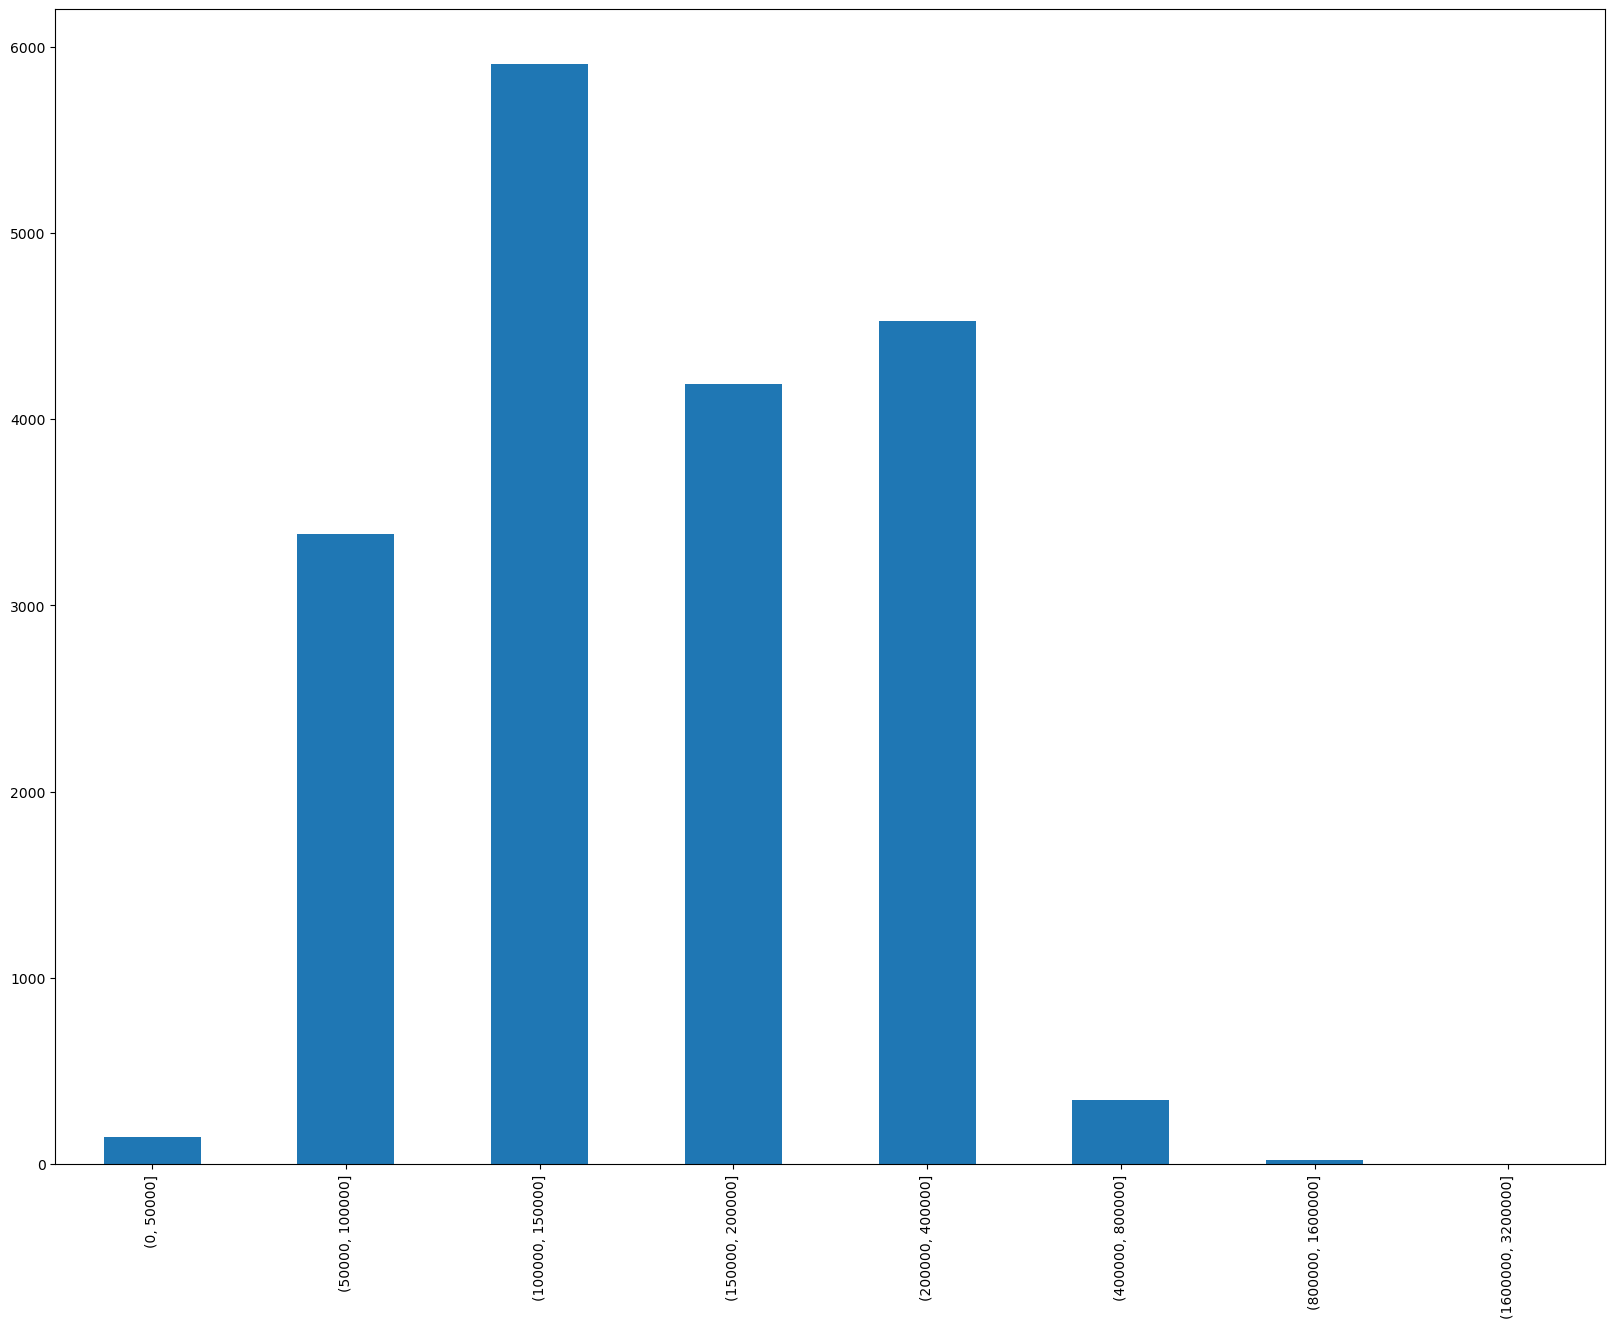

In [5]:
fig_income_defaulters = df_dfaulters['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,15))
plt.savefig('figures\\fig_income_def.png')


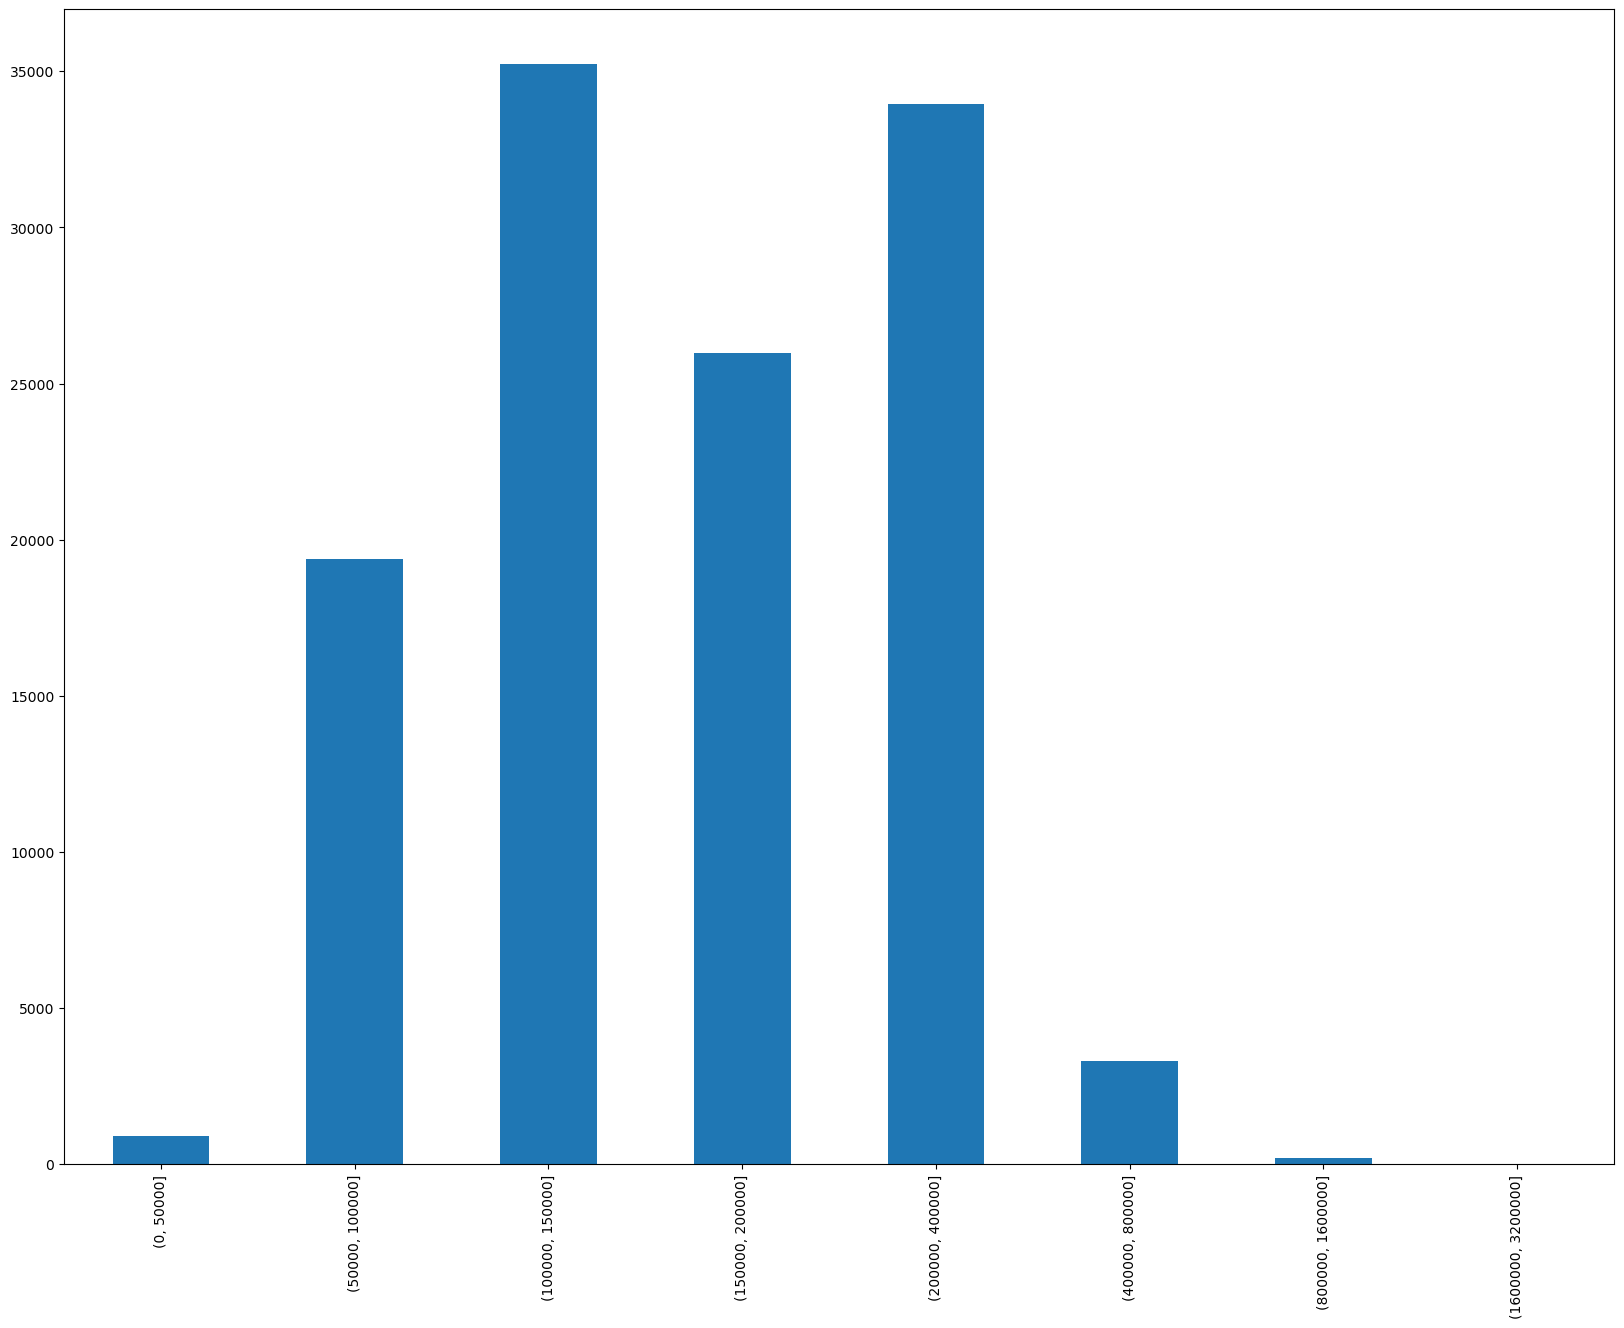

In [6]:
fig_income_normal = df_normal['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,15))
plt.savefig('figures\\fig_income_nor.png')

There is slightly more defaulters in lower income brackets. 

The r-value is: 0.3837679708648895


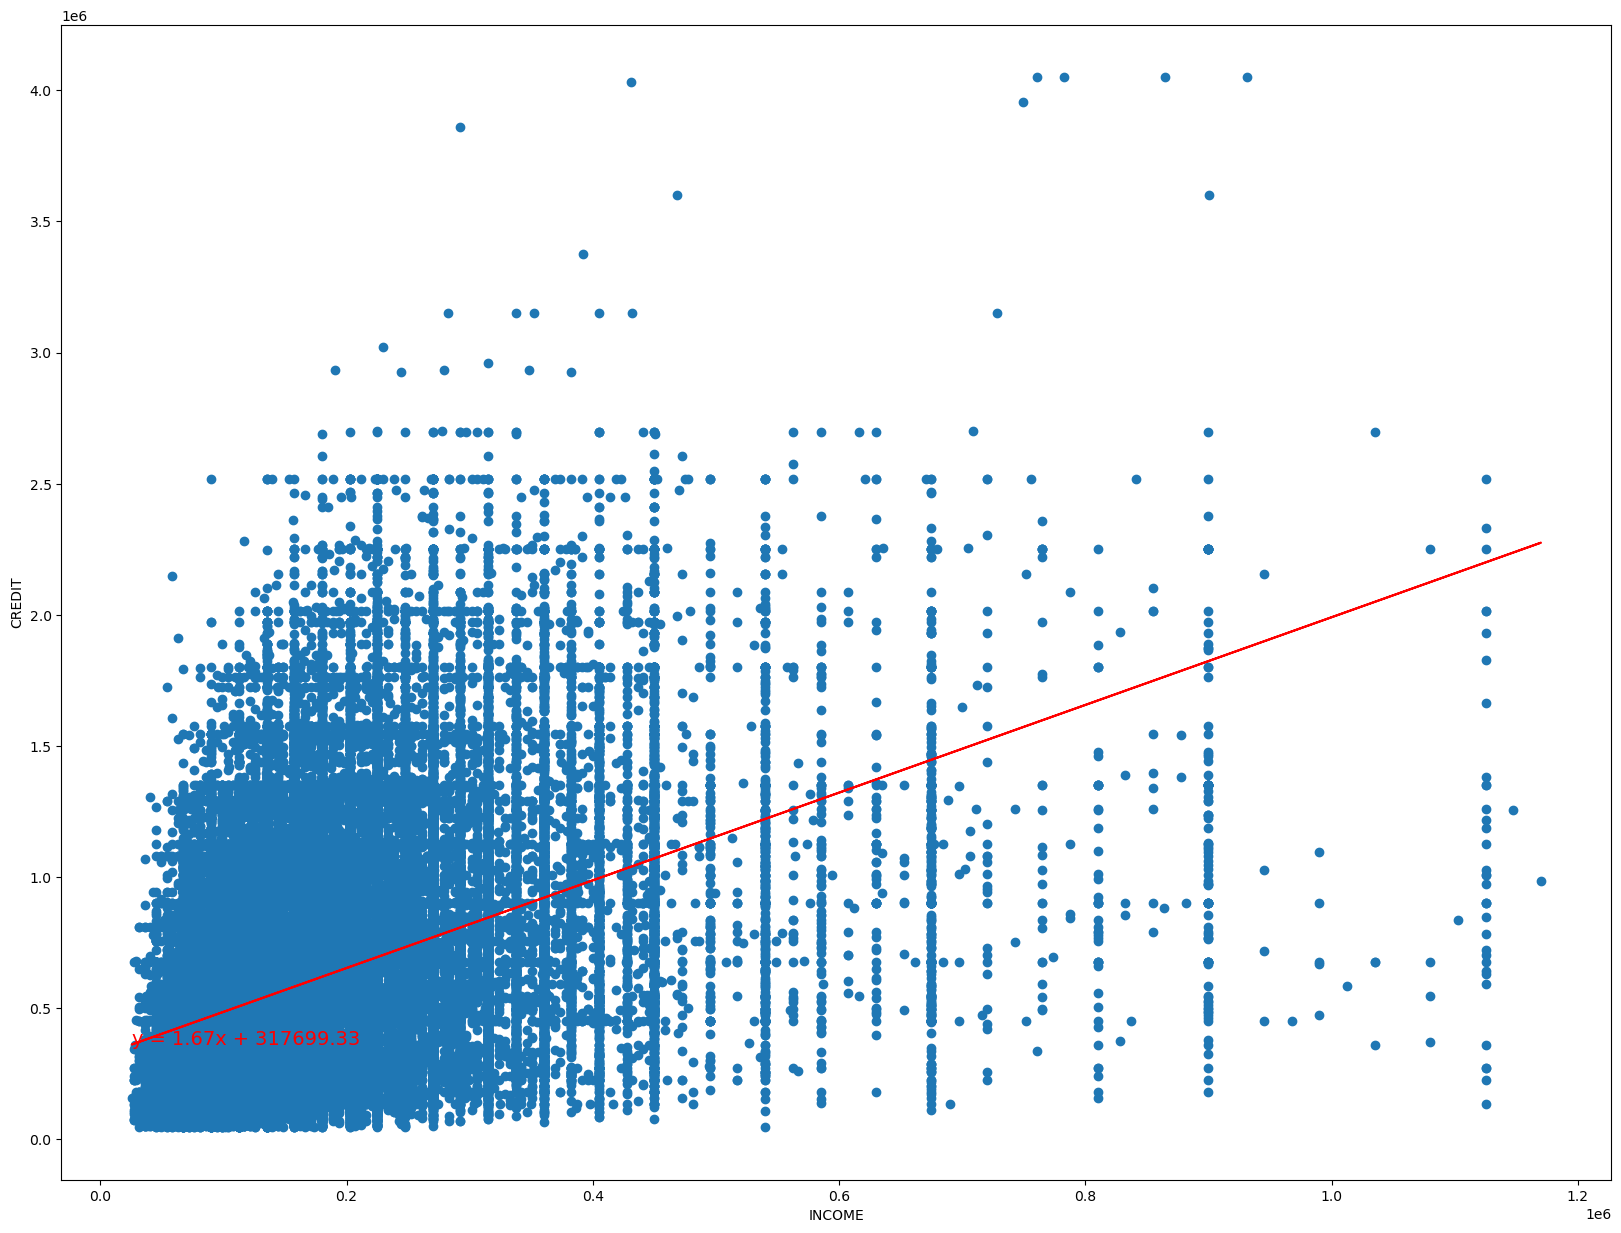

NameError: name 'name' is not defined

In [7]:
#income_df = main_df[['AMT_CREDIT',"AMT_INCOME_TOTAL"]]
#income_df = income_df[(np.abs(stats.zscore(income_df["AMT_INCOME_TOTAL"])) < 3)]
#fig_icvomeVScredit = plt.scatter(income_df["AMT_INCOME_TOTAL"],income_df["AMT_CREDIT"])
fig_icvomeVScredit = plt.figure(figsize=(20,15))
x = main_df_NO_outlier["AMT_INCOME_TOTAL"] 
y = main_df_NO_outlier["AMT_CREDIT"]
xlabel = 'INCOME'
ylabel = 'CREDIT'
# Define a function to create Linear Regression plots
def linear_reg_plot(x,y,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    print(f"The r-value is: {rvalue}")
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,color = 'r')
    line_note = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    plt.annotate(line_note,(min(x),min(regress_values)),color="red",fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    name = xlabel + ylabel
linear_reg_plot(x,y,xlabel,ylabel)
plt.savefig(f'figures\{name}.png')
slope, intercept, r, p, std_err = stats.linregress(main_df_NO_outlier["AMT_INCOME_TOTAL"], main_df_NO_outlier["AMT_CREDIT"])
print(r)


Positive coorelation between income and credit. 